In [ ]:
# Install necessary libraries
!pip install yfinance PyPortfolioOpt

In [ ]:
## Libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy import stats

import yfinance as yf

In [ ]:
# Function to calculate start and end dates based on the number of years from today
def calculate_date_range(years):
    end_date = datetime.today()
    start_date = end_date - timedelta(days=years * 365)
    return start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d')

In [ ]:
# Define the number of years for the analysis
years = 2

# Calculate the start and end dates
start_date, end_date = calculate_date_range(years)

# Magnificent Seven ticker names - could add NFLX for FAANG
tickers = ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']

### RSI

https://www.investopedia.com/terms/r/rsi.asp

The RSI is a momentum oscillator that is widely used in technical analysis of stocks and commodities to identify changes in momentum and price direction.

Momentrum indicators are technical analysis tools used to determine the strength or weakness of a stock's price trend. Momentum measures the rate of the rise or fall of stock prices

The relative strength index (RSI) is a momentum indicator used in technical analysis. RSI measures the speed and magnitude of a security's recent price changes to detect overbought or oversold conditions in the price of that security.

- An asset is usually considered overbought when the RSI is above 70 and oversold when it is below 30.
- In some situations, the RSI line crossing below the overbought line or above the oversold line can be seen by traders as a signal to buy or sell.
- The RSI works best in trading ranges rather than trending markets.

In [ ]:
# Plots the RSI for a given stock and highlights overbought and oversold thresholds.

upper_line = 80
lower_line = 20

def plot_rsi(data, ticker, window=14):
    """
    Plot the Relative Strength Index (RSI) for a given stock.

    Parameters:
    data (DataFrame): The stock data.
    ticker (str): The stock ticker symbol.
    window (int): The lookback window for RSI calculation.

    Returns:
    None
    """

    # Calculate the RSI
    delta = data['Adj Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    # Create a figure and axes
    fig, ax1 = plt.subplots(figsize=(10, 7))

    # Plot the price on the primary y-axis (ax1)
    ax1.plot(data.index, data['Adj Close'], label='Price', color='blue')
    ax1.set_ylabel('Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a secondary y-axis (ax2) for RSI
    ax2 = ax1.twinx()  # Create a twin Axes sharing the xaxis

    # Plot the RSI on the secondary y-axis (ax2)
    ax2.plot(data.index, rsi, label='RSI', color='purple')
    ax2.set_ylabel('RSI', color='purple')
    ax2.tick_params(axis='y', labelcolor='purple')
    ax2.axhline(upper_line, color='red', linestyle='--')
    ax2.axhline(lower_line, color='green', linestyle='--')

    # Add a title and display the legend
    plt.title(f'RSI and Price of {ticker}')
    plt.xlabel('Date')
    fig.tight_layout()  # Adjust the layout to prevent overlapping elements
    plt.show()


[*********************100%***********************]  1 of 1 completed


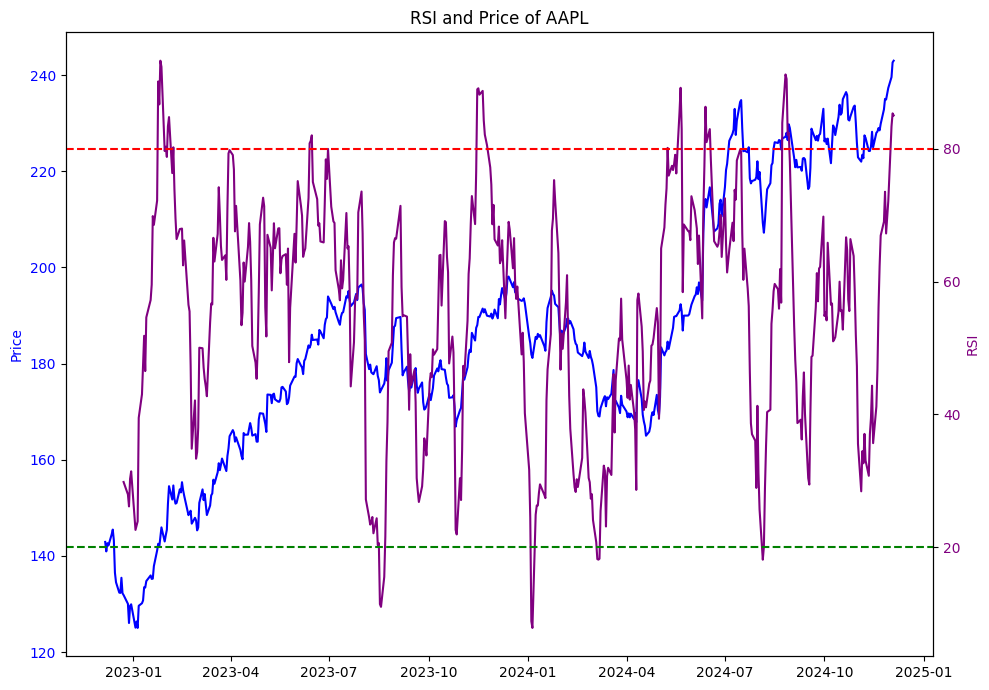

[*********************100%***********************]  1 of 1 completed


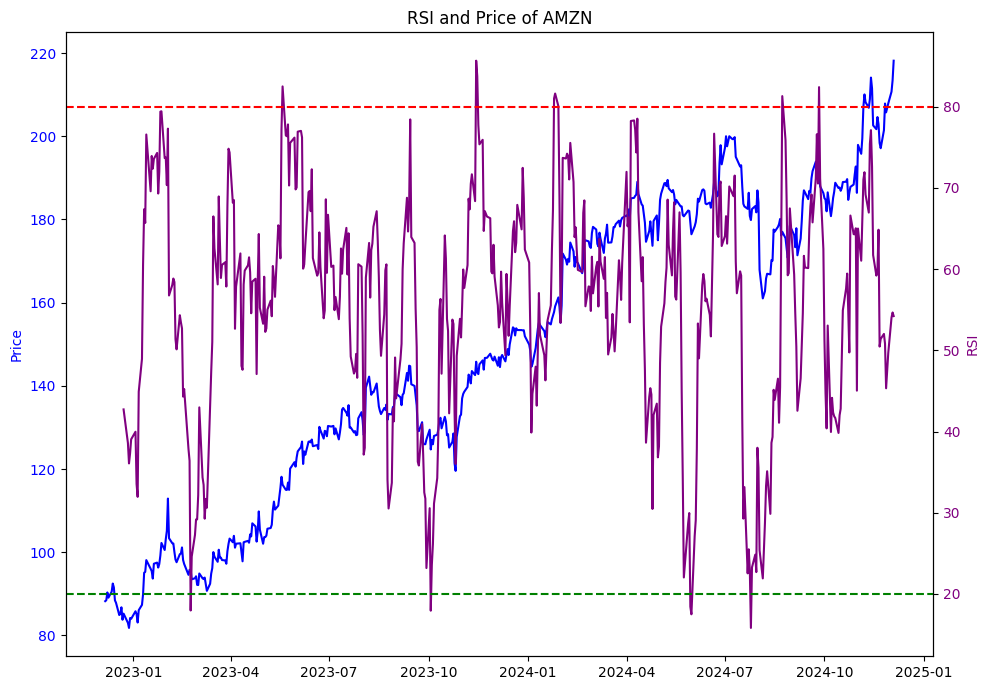

[*********************100%***********************]  1 of 1 completed


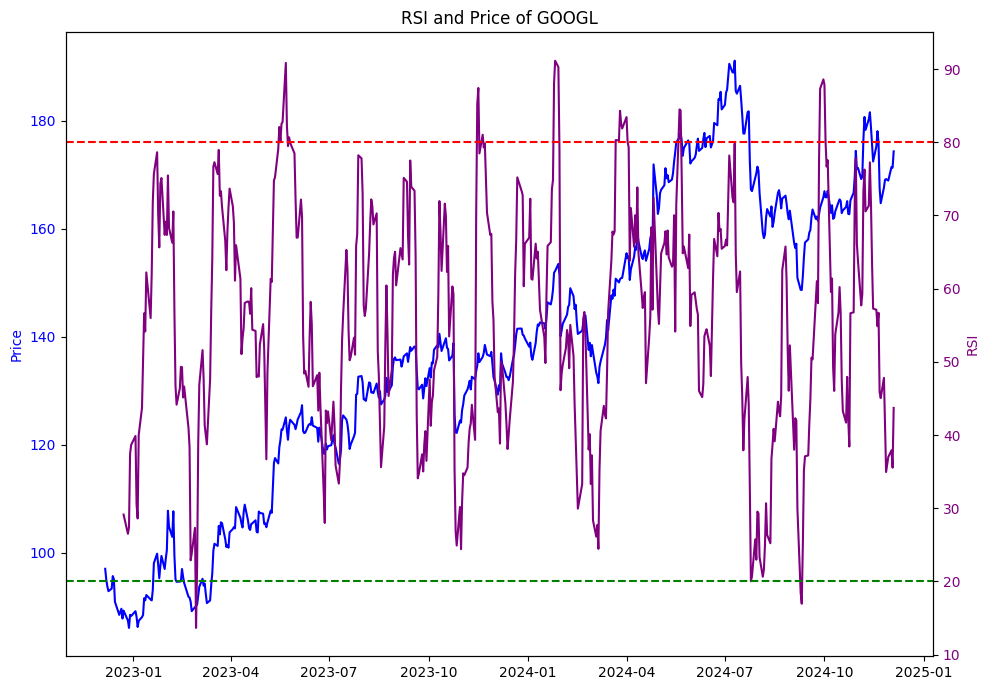

[*********************100%***********************]  1 of 1 completed


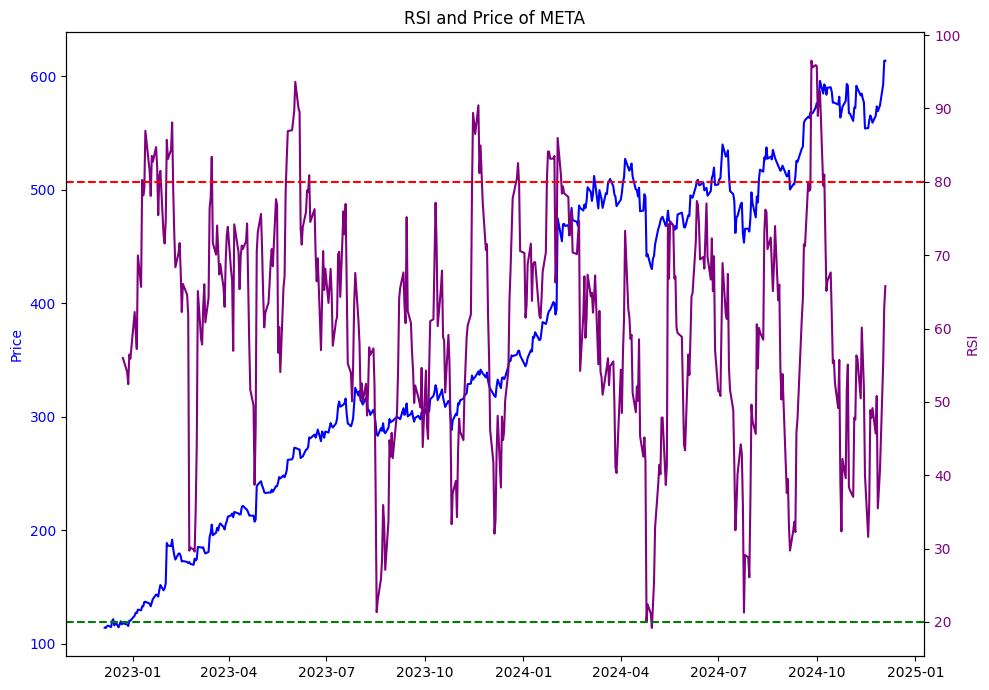

[*********************100%***********************]  1 of 1 completed


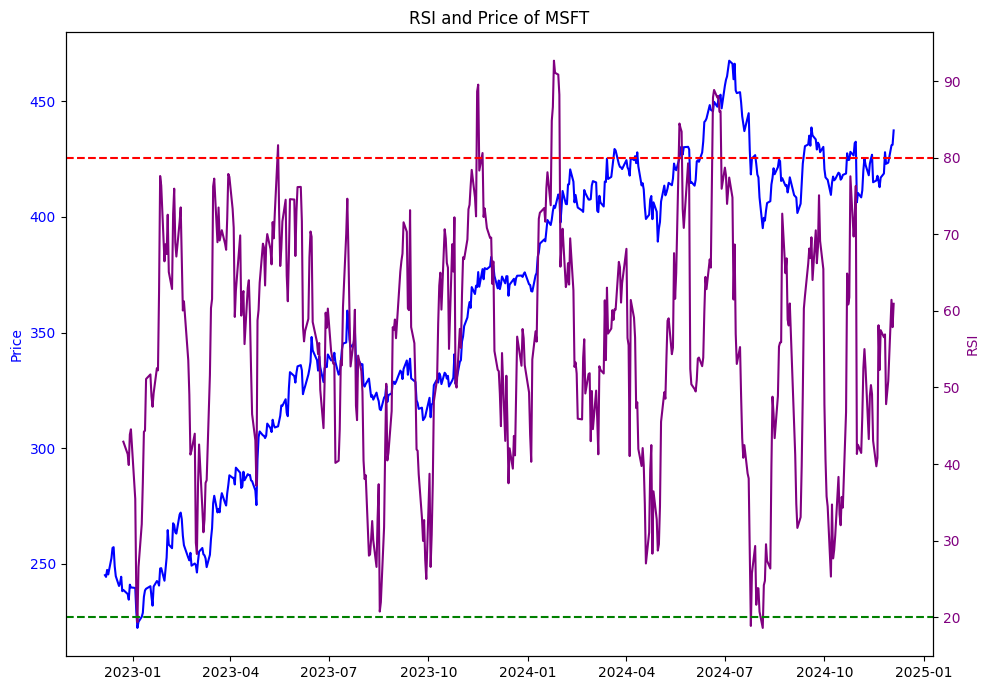

[*********************100%***********************]  1 of 1 completed


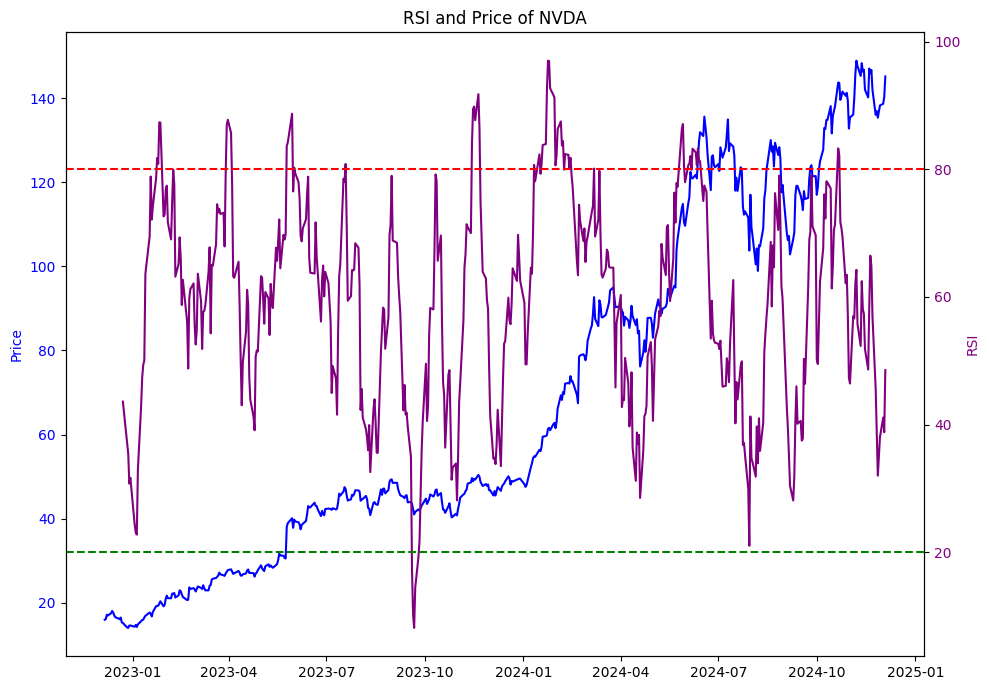

[*********************100%***********************]  1 of 1 completed


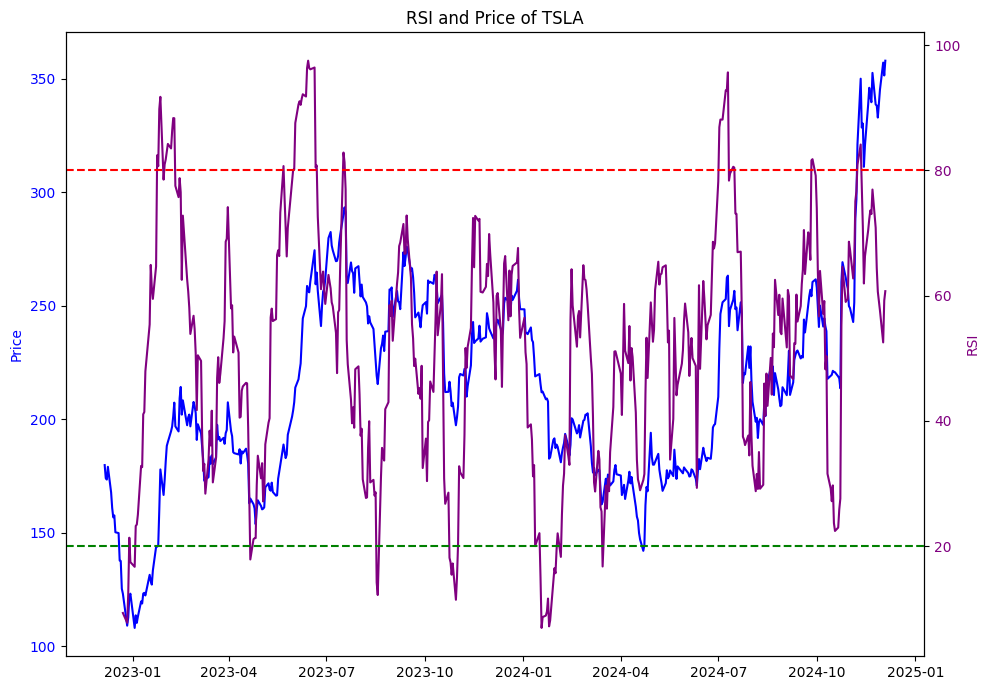

In [ ]:
# Download historical data for each ticker and plot its RSI
for ticker in tickers:
    data_ticker = yf.download(ticker, start=start_date, end=end_date)
    plot_rsi(data_ticker, ticker)


### Bollinger Bands

https://www.investopedia.com/terms/b/bollingerbands.asp

Bollinger Bands is a technical analysis tool developed by John Bollinger in the 1980s to help investors and traders gauge market volatility and identify when securities are poised to rise or fall.

Bollinger Bands, a popular tool among investors and traders, helps gauge the volatility of stocks and other securities to determine if they are over- or undervalued

the bands appear on stock charts as three lines that move with the price. The center line is the stock price's 20-day simple moving average (SMA). The upper and lower bands are set at a certain number of standard deviations, usually two, above and below the middle line.

The bands widen when a stock's price becomes more volatile and contract when it is more stable. Many traders see stocks as overbought as their price nears the upper band and oversold as they approach the lower band, signaling an opportune time to trade

- Bollinger Bands is a technical analysis tool used to determine where prices are high and low relative to each other.
- These bands are composed of three lines: a simple moving average (the middle band) and an upper and lower band.
- The upper and lower bands are typically two standard deviations above or below a 20-period simple moving average (SMA).
- The bands widen and narrow as the volatility of the underlying asset changes.
- Secondary indicator that is best used to confirm other analysis methods


In [ ]:
# Plot Bollinger Bands, including the closing price, middle band (SMA), and upper/lower bands (±2 standard deviations).

def plot_bollinger_bands(data, ticker, window=20):
    """
    Plot the Bollinger Bands for a given stock.

    Parameters:
    data (DataFrame): The stock data.
    ticker (str): The stock ticker symbol.
    window (int): Simple Moving Average period.

    Returns:
    None
    """

    # Calculate the middle band (simple moving average)
    middle_band = data['Adj Close'].rolling(window=window).mean()

    # Calculate standard deviation
    std_dev = data['Adj Close'].rolling(window=window).std()

    # Calculate Upper and Lower Bands
    upper_band = middle_band + (std_dev * 2)
    lower_band = middle_band - (std_dev * 2)

    # Plot the closing price and Bollinger Bands
    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data['Adj Close'], label='Closing Price', color='gray')
    plt.plot(data.index, middle_band, label='Middle Band', color='blue')
    plt.plot(data.index, upper_band, label='Upper Band', color='red')
    plt.plot(data.index, lower_band, label='Lower Band', color='green')

    # Add title, labels, and legend
    plt.title(f'Bollinger Bands of {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


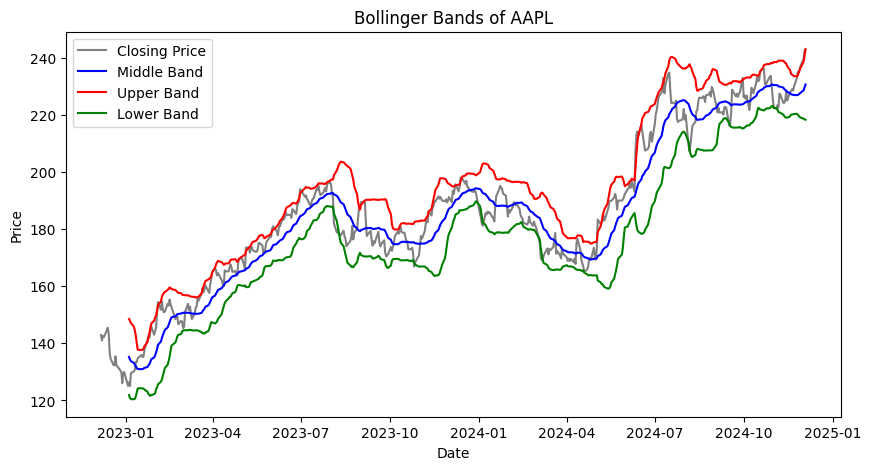

[*********************100%***********************]  1 of 1 completed


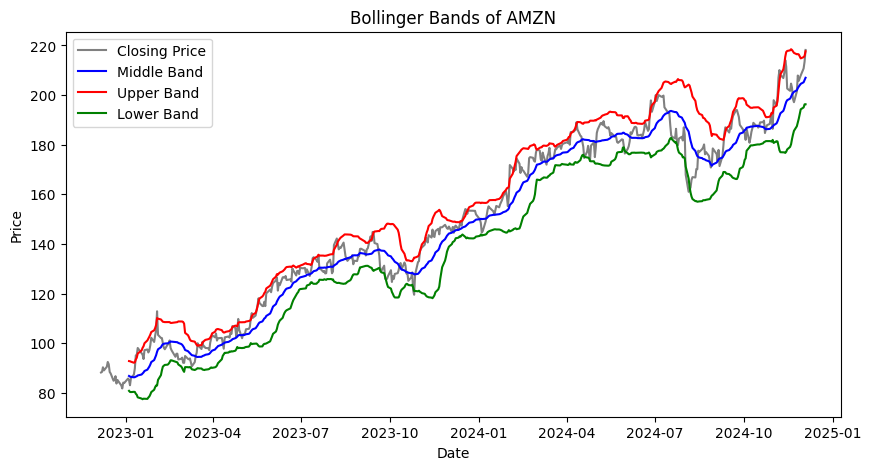

[*********************100%***********************]  1 of 1 completed


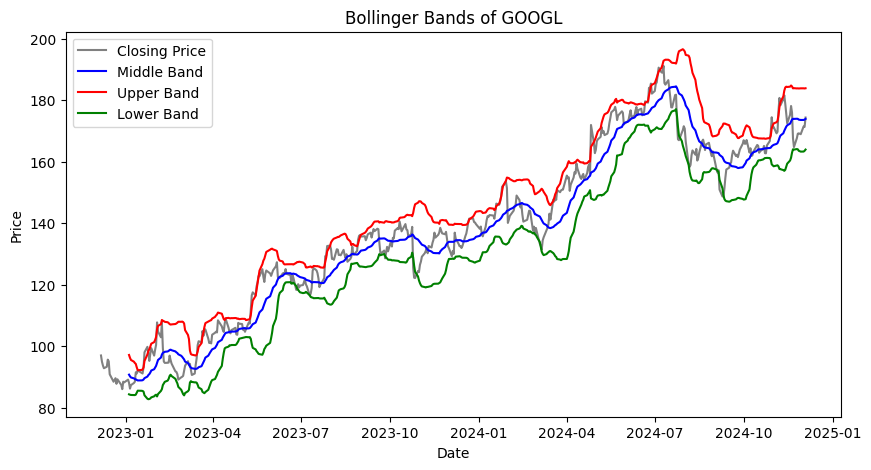

[*********************100%***********************]  1 of 1 completed


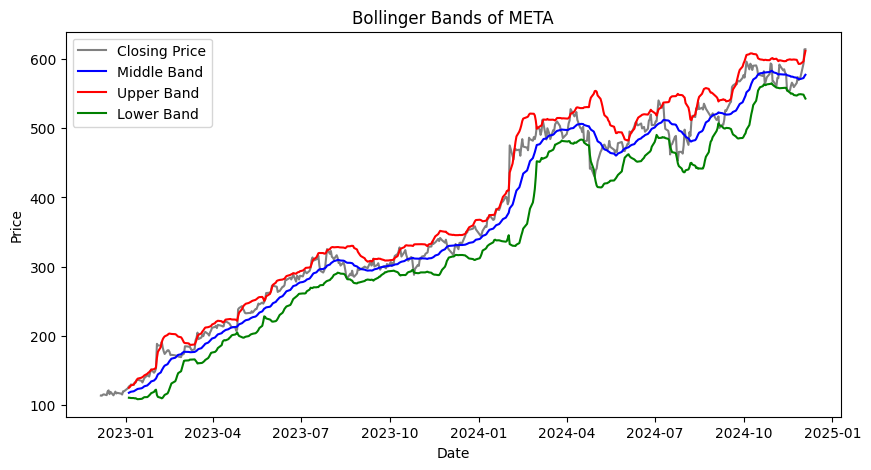

[*********************100%***********************]  1 of 1 completed


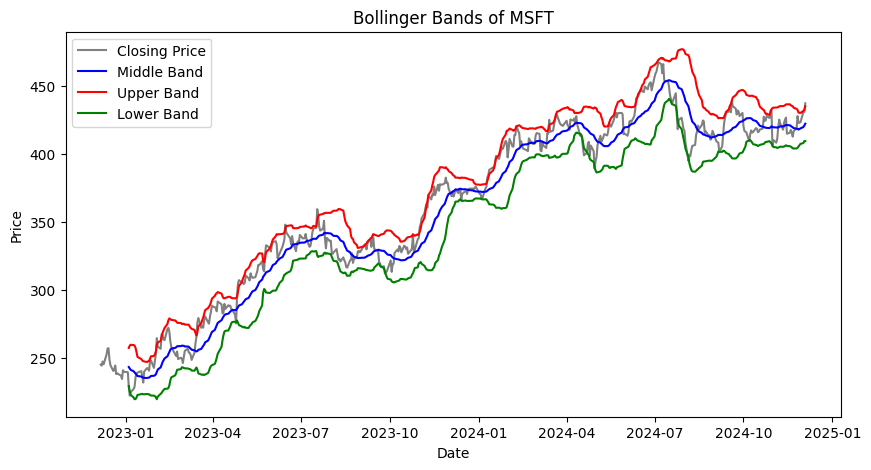

[*********************100%***********************]  1 of 1 completed


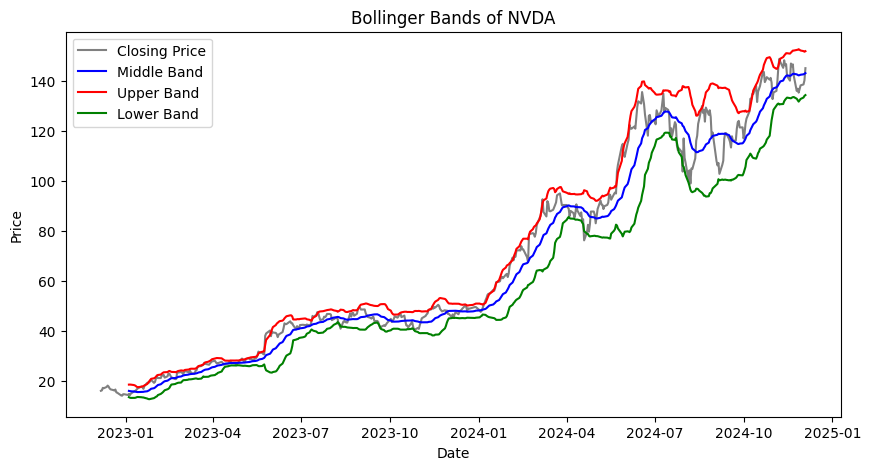

[*********************100%***********************]  1 of 1 completed


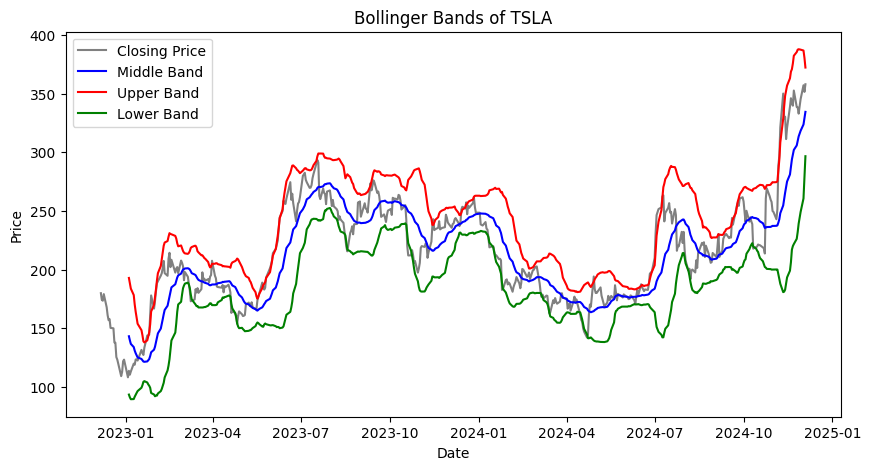

In [ ]:
# Download historical data for each ticker and plot its Bollinger Bands
for ticker in tickers:
    data_ticker = yf.download(ticker, start=start_date, end=end_date)
    plot_bollinger_bands(data_ticker, ticker)


### Price-to-Earnings Ratio (P/E)

https://www.investopedia.com/terms/p/price-earningsratio.asp

The price-to-earnings ratio compares a company's share price with its earnings per share. Analysts and investors use it to determine the relative value of a company's shares in side-by-side comparisons.

- The price-to-earnings (P/E) ratio is the proportion of a company's share price to its earnings per share.
- A high P/E ratio could mean that a company's stock is overvalued or that investors expect high growth rates.
- Companies with no earnings or are losing money don't have a P/E ratio because there's nothing to put in the denominator.
- The two most used P/E ratios are forward and trailing P/E.
- P/E ratios are most valuable when comparing similar companies in the same industry or for a single company over time.



In [ ]:
def plot_pe_ratios(ticker_data_dict, eps_type='trailing'):
    """
    Plot the Price-to-Earnings (P/E) ratios for multiple stocks on the same graph.

    Parameters:
    ticker_data_dict (dict): A dictionary with tickers as keys and their data as values.
                              Each data entry should be a tuple of (dataframe, eps)
    eps_type (str): Type of EPS to use - 'trailing' or 'forward'
    Returns:
    None
    """
    # Create the plot
    plt.figure(figsize=(12, 6))

    # Iterate through the tickers and their data
    for ticker, (data, eps_values) in ticker_data_dict.items():
        # Choose the appropriate EPS based on the type
        eps = eps_values['trailing'] if eps_type == 'trailing' else eps_values['forward']

        # Check if EPS value is valid
        if eps is None or eps == 0:
            print(f"Skipping {ticker}: {eps_type} EPS is not available or zero")
            continue

        # Calculate the P/E ratio
        pe_ratio = data['Adj Close'] / eps

        # Plot the P/E ratio for this ticker
        plt.plot(data.index, pe_ratio, label=f'{ticker} PE Ratio')

    # Customize the plot
    title_type = 'Trailing' if eps_type == 'trailing' else 'Forward'
    plt.title(f'{title_type} PE Ratios of Selected Stocks')
    plt.xlabel('Date')
    plt.ylabel(f'{title_type} PE Ratio')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


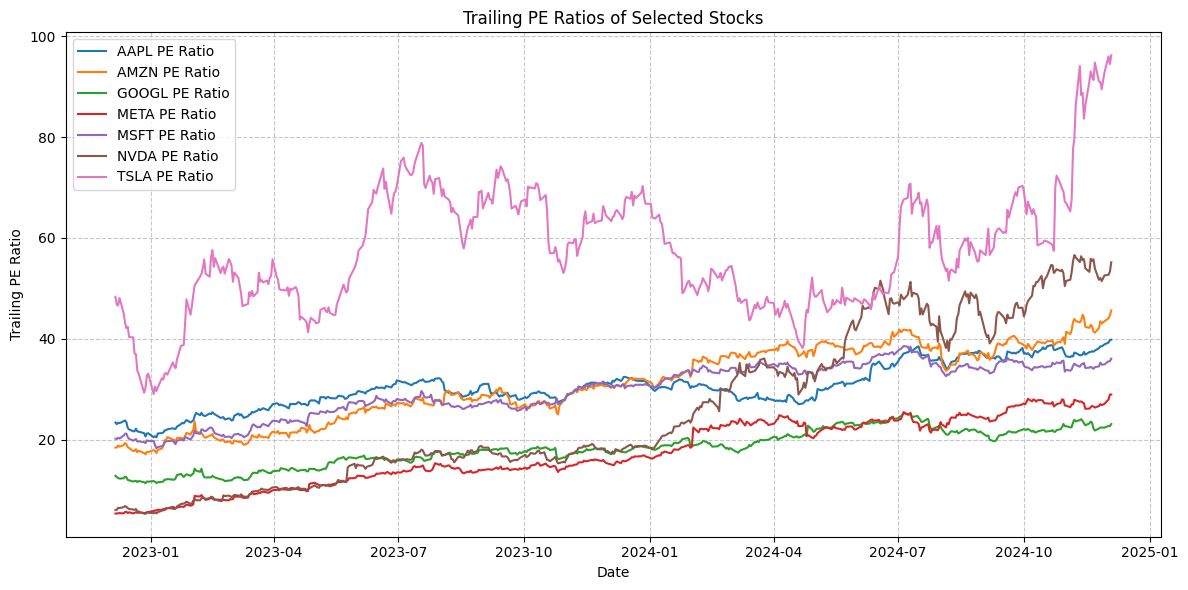

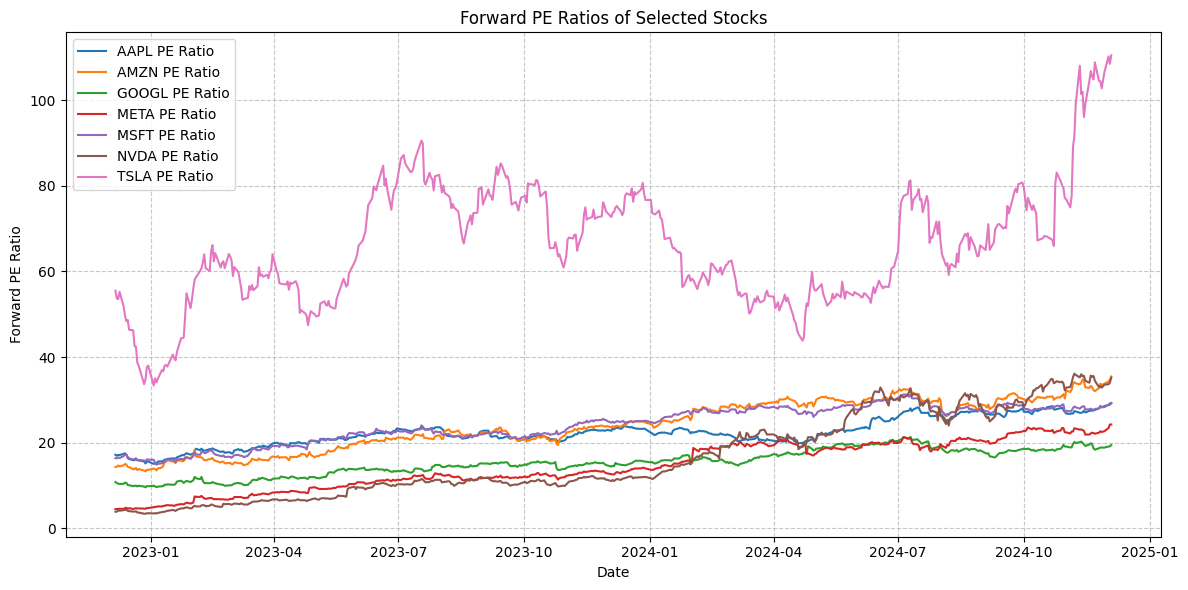

In [ ]:
# Prepare the data for plotting
ticker_data = {}
for ticker in tickers:
    stock = yf.Ticker(ticker)

    # Collect both trailing and forward EPS
    eps_values = {
        'trailing': stock.info.get('trailingEps'),
        'forward': stock.info.get('forwardEps')
    }

    data_ticker = yf.download(ticker, start=start_date, end=end_date)

    # Store the data and EPS values in the dictionary
    ticker_data[ticker] = (data_ticker, eps_values)

# Plot P/E ratios for trailing EPS
plot_pe_ratios(ticker_data, eps_type='trailing')

# Plot P/E ratios for forward EPS
plot_pe_ratios(ticker_data, eps_type='forward')


### Beta comparison

https://www.investopedia.com/investing/beta-know-risk/
https://www.investopedia.com/terms/b/beta.asp

# What Is Beta?
Beta is a measure of a stock's volatility in relation to the overall market. By definition, the market, such as the S&P 500 Index, has a beta of 1.0, and individual stocks are ranked according to how much they deviate from the market. A stock that swings more than the market over time has a beta above 1.0. If a stock moves less than the market, the stock's beta is less than 1.0.

# Key Takeaways
- Beta is a concept that measures the expected move in a stock relative to movements in the overall market.
- A beta greater than 1.0 suggests that the stock is more volatile than the broader market, and a beta less than 1.0 indicates a stock with lower volatility.
- Beta is a component of the Capital Asset Pricing Model, which calculates the cost of equity funding and can help determine the rate of return to expect relative to perceived risk.
- Critics argue that beta does not give enough information about the fundamentals of a company and is of limited value when making stock selections.
- Beta is probably a better indicator of short-term rather than long-term risk.


Beta measures the volatility of a stock in relation to the market. On this site we use the S&P 500 index to represent the market.

The beta of the stock is calculated using regression analysis. The S&P 500 is considered to have a Beta of 1. So if the stock beta is greater than 1 this means the stock is more volatile than the market, and if the stock beta is less that 1 then the stock is less volatile. For example, if a stock has a beta of 1.5, a 1% change in the market will result in an estimated 1.5% change in the stock. Stocks with high beta are considered to be more risky than those with low beta.

Calculation

Beta = Covariance(stock returns, market returns) / Variance(market returns)

The default setting is 200 daily bars but 36 monthly bars is also commonly used for Beta.


In [ ]:
def calculate_beta(ticker, start_date, end_date, beta_settings=[200, 36]):
    """
    Calculate beta price of a given stock (compared to SP500) for a given period

    Parameters:
    ticker (str): The stock ticker symbol.
    start_date (str): The start date of the analysis.
    end_date (str): The end date of the analysis.
    beta_settings (list): A list of beta settings values to consider.

    Returns:
    DataFrame: A DataFrame containing the stock price and the beta values for each setting.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    market_data = yf.download("^GSPC", start=start_date, end=end_date)  # S&P 500 index

    # Calculate daily returns
    stock_data['Return'] = stock_data['Adj Close'].pct_change()
    market_data['Return'] = market_data['Adj Close'].pct_change()

    # Ensure data alignment
    data = pd.DataFrame({
        'Stock_Return': stock_data['Return'],
        'Market_Return': market_data['Return']
    }).dropna()

    # Calculate beta for each setting
    beta_values = {}
    for setting in beta_settings:
        rolling_covariance = data['Stock_Return'].rolling(window=setting).cov(data['Market_Return'])
        rolling_variance = data['Market_Return'].rolling(window=setting).var()
        beta_values[f'Beta_{setting}'] = rolling_covariance / rolling_variance

    # Merge beta values with stock data
    beta_df = pd.DataFrame(beta_values)
    beta_df.index = data.index
    combined_data = pd.concat([stock_data['Adj Close'], beta_df], axis=1)
    return combined_data



In [ ]:
def plot_beta(ticker, start_date, end_date, beta_settings=[200, 36]):
    """
    Plot beta price of a given stock (compared to SP500) for a given period

    Parameters:
    ticker (str): The stock ticker symbol.
    start_date (str): The start date of the analysis.
    end_date (str): The end date of the analysis.
    beta_settings (list): A list of beta settings values to consider.

    Returns:
    None
    """
    # retrieve beta prices for the stock
    combined_data = calculate_beta(ticker, start_date, end_date, beta_settings)

    # Plot stock price and beta
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_title(f"Stock Price and Beta ({ticker})", fontsize=16)
    ax1.plot(combined_data.index, combined_data[ticker], label=f'{ticker} Price', color='gray')
    ax1.set_ylabel('Stock Price', color='gray')
    ax1.tick_params(axis='y', labelcolor='gray')

    ax2 = ax1.twinx()
    beta_values = combined_data.iloc[:, 1:]
    for beta_col in beta_values.keys():
        ax2.plot(combined_data.index, combined_data[beta_col], label=beta_col)
    ax2.axhline(1.0, color='red', linestyle='--')
    ax2.set_ylabel('Beta', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)
    plt.show()



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


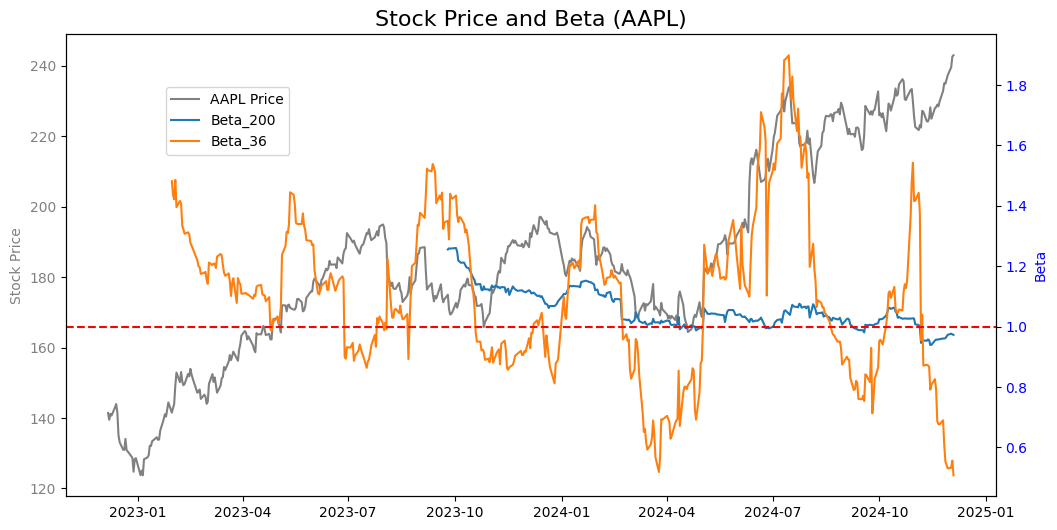

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


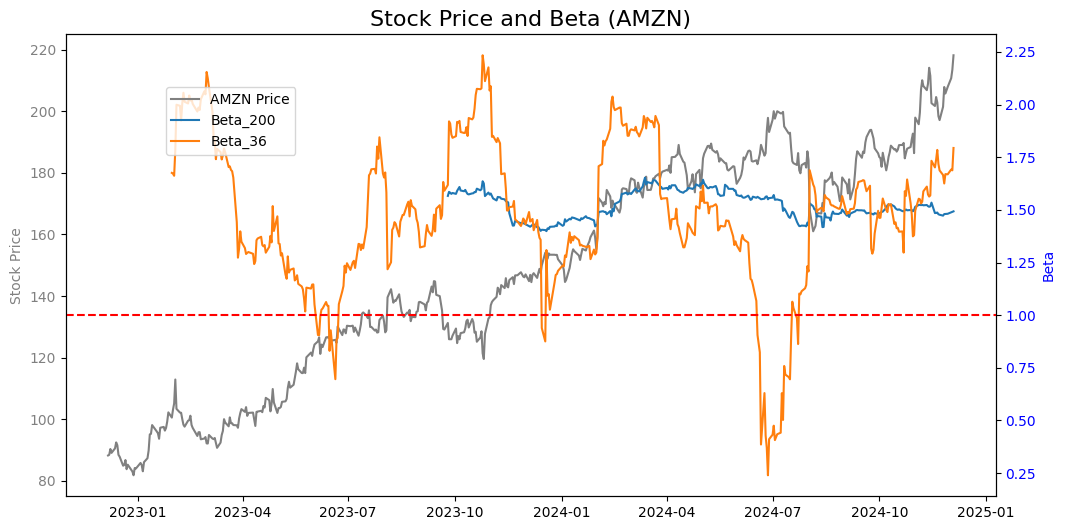

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


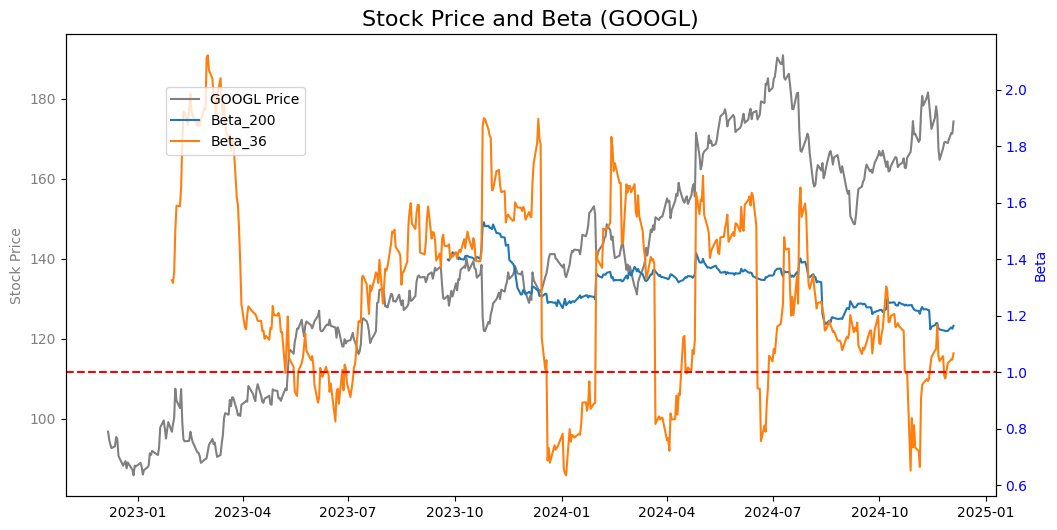

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


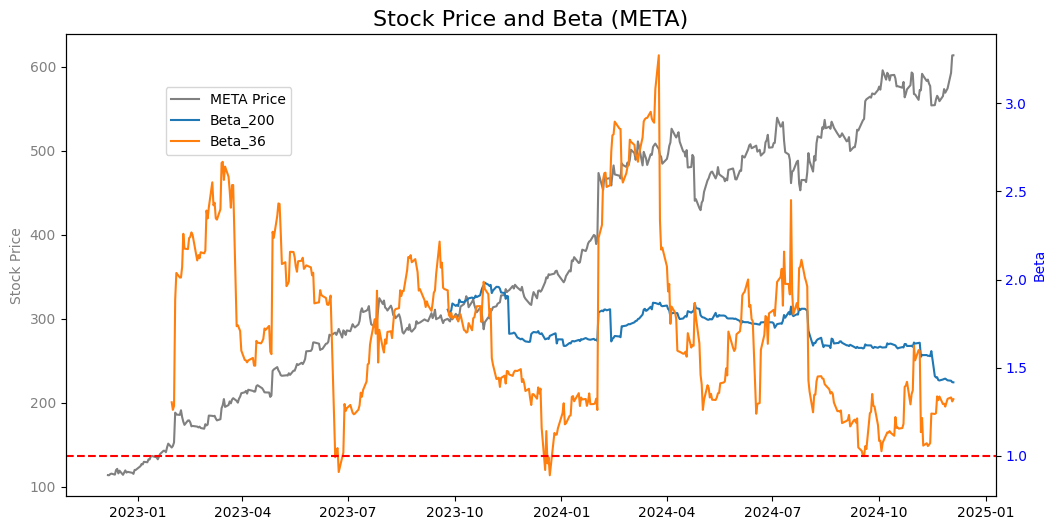

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


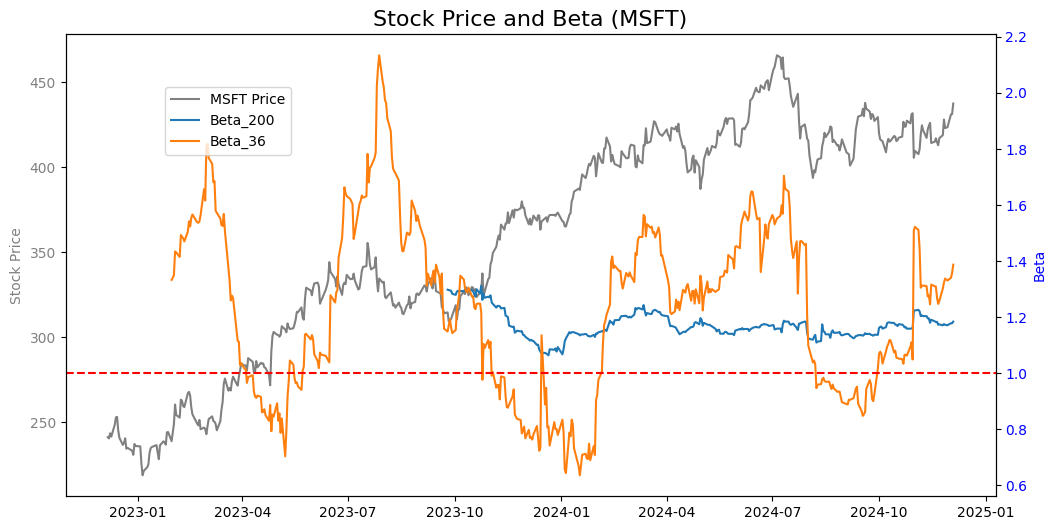

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


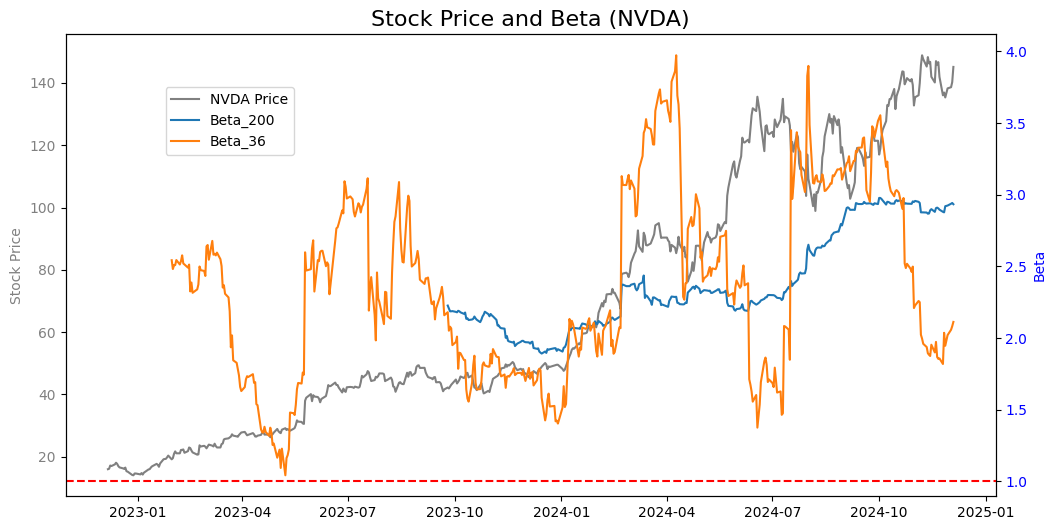

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


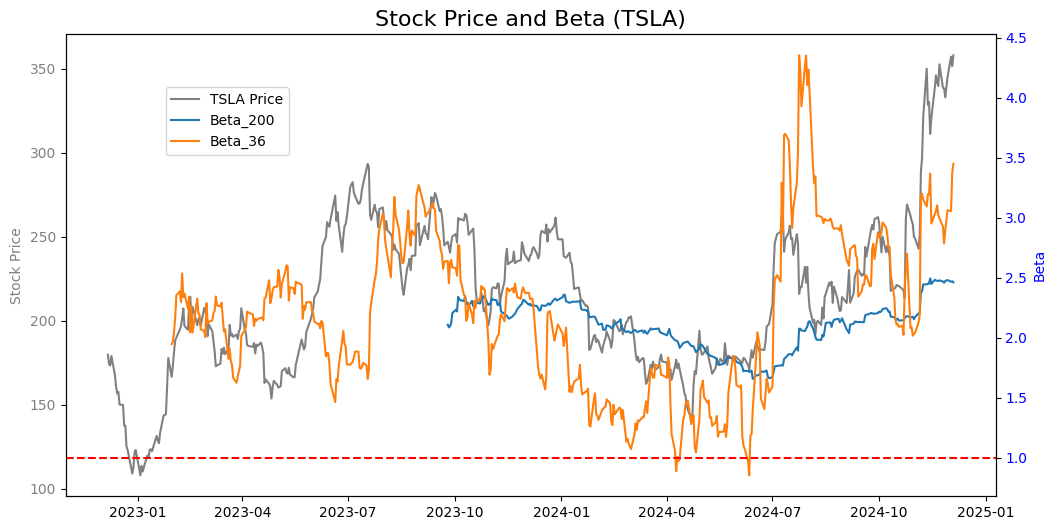

In [ ]:
# Download historical data for each ticker and plot its RSI
for ticker in tickers:
    plot_beta(ticker, start_date, end_date)


### Moving Average Convergence Divergence (MACD)

https://www.investopedia.com/terms/m/macd.asp

Moving average convergence/divergence (MACD) is a technical indicator to help investors identify price trends, measure trend momentum, and identify entry points for buying or selling. Moving average convergence/divergence (MACD) is a trend-following momentum indicator that shows the relationship between two exponential moving averages (EMAs) of a security’s price. MACD was developed in the 1970s by Gerald Appel, and is one of the most popular technical tools, readily available on most trading platforms offered by online stock brokers.

Key Takeaways
- Moving average convergence/divergence (MACD) is a technical indicator to help investors identify entry points for buying or selling.
- The MACD line is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.
- The signal line is a nine-period EMA of the MACD line.
- MACD is best used with daily periods, where the traditional settings of 26/12/9 days is the default.


In [ ]:
# Plots the MACD and signal line for each ticker to show momentum trends.
def plot_macd(data, ticker):
    """
    Plot the Moving Average Convergence Divergence (MACD) for a given stock.

    Parameters:
    data (DataFrame): The stock data.
    ticker (str): The stock ticker symbol.

    Returns:
    None
    """
    # Calculate the 12-day and 26-day EMA
    ema_12 = data['Adj Close'].ewm(span=12, adjust=False).mean()
    ema_26 = data['Adj Close'].ewm(span=26, adjust=False).mean()

    # Calculate the MACD
    macd = ema_12 - ema_26

    # Calculate the signal line
    signal = macd.ewm(span=9, adjust=False).mean()

    # Create a figure and axes
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot the price on the primary y-axis (ax1)
    ax1.plot(data.index, data['Adj Close'], label='Price', color='gray')
    ax1.set_ylabel('Price', color='gray')
    ax1.tick_params(axis='y', labelcolor='gray')

    # Create a secondary y-axis (ax2) for MACD
    ax2 = ax1.twinx()  # Create a twin Axes sharing the xaxis

    ax2.plot(data.index, macd, label=f'{ticker} MACD')
    ax2.plot(data.index, signal, label=f'{ticker} Signal Line')

    plt.title(f'MACD and Signal Line of {ticker}')
    plt.xlabel('Date')
    plt.ylabel('MACD')
    plt.legend(loc="upper left")
    plt.show()


[*********************100%***********************]  1 of 1 completed


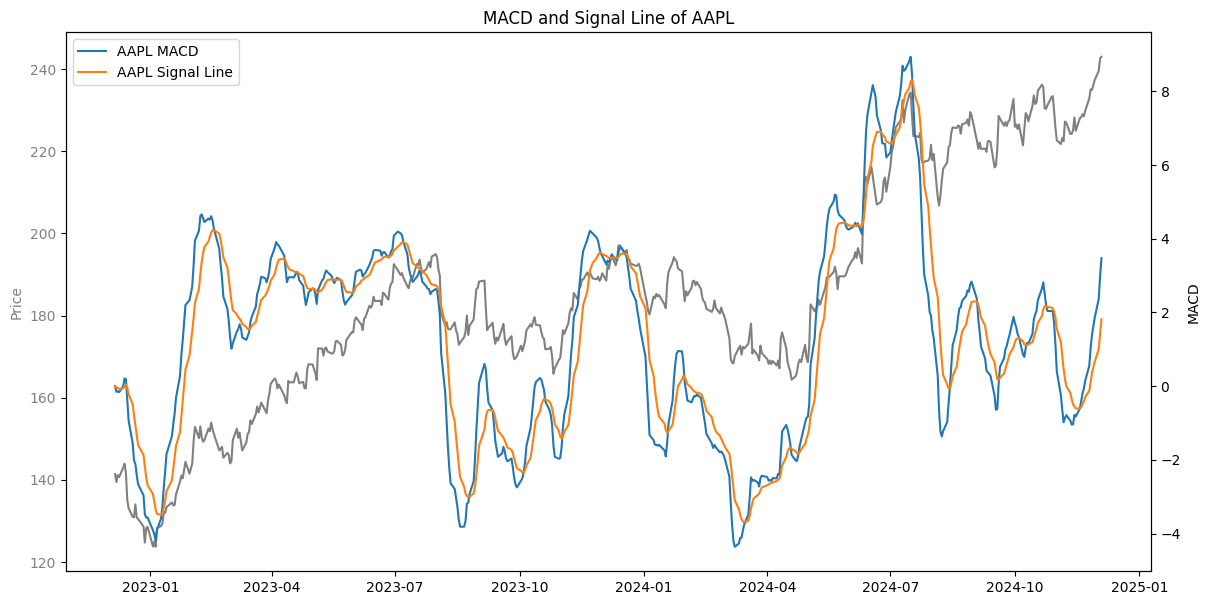

[*********************100%***********************]  1 of 1 completed


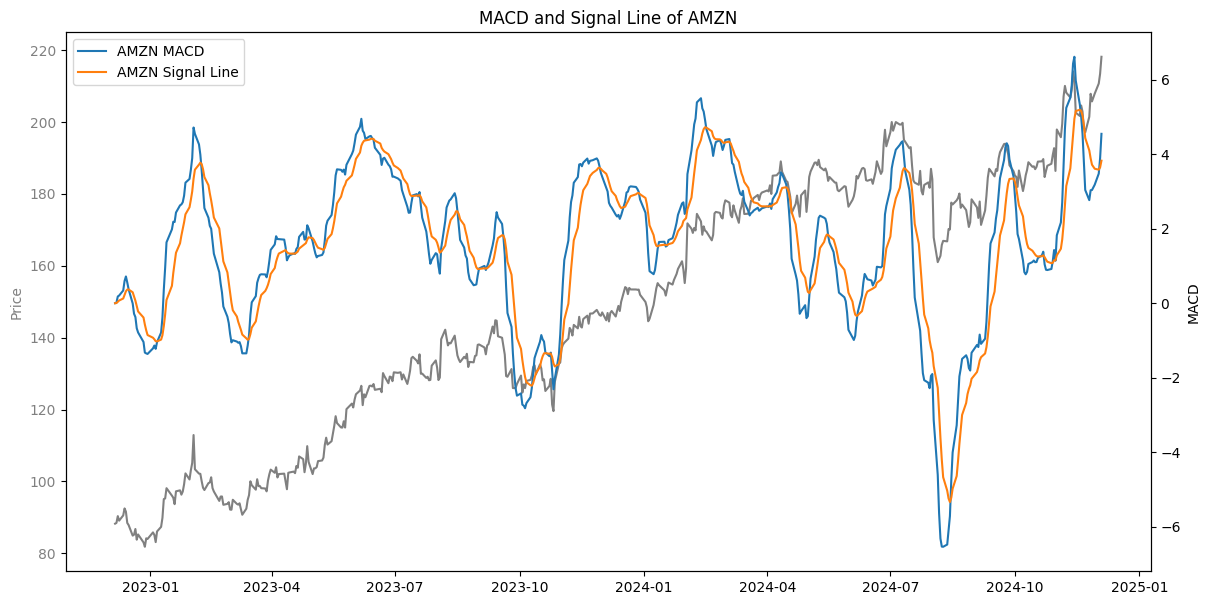

[*********************100%***********************]  1 of 1 completed


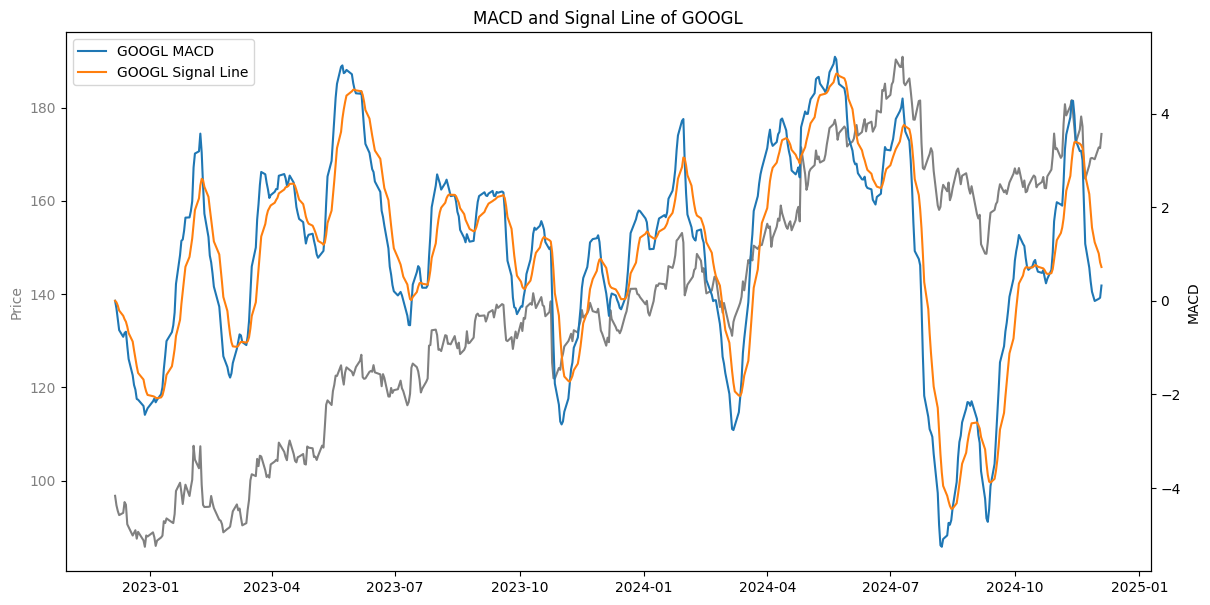

[*********************100%***********************]  1 of 1 completed


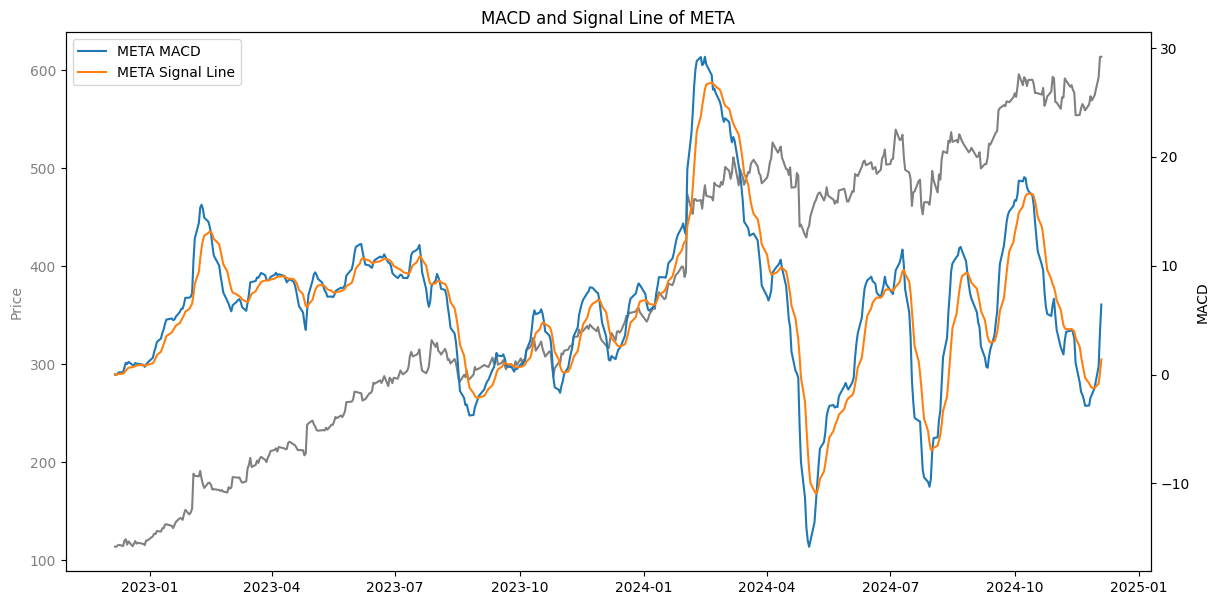

[*********************100%***********************]  1 of 1 completed


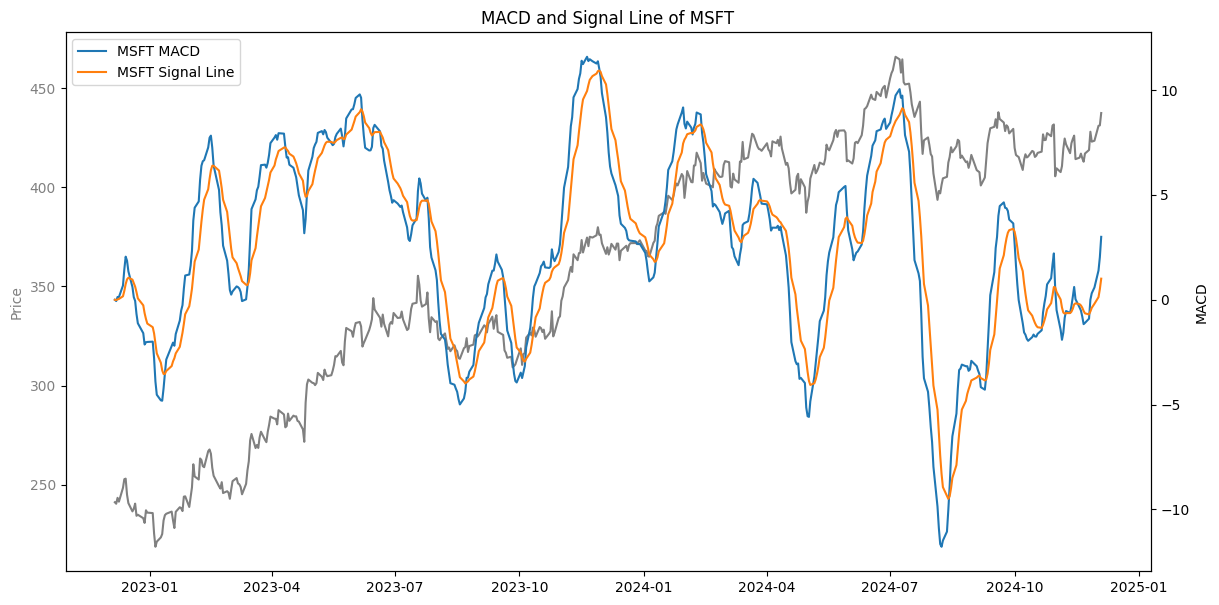

[*********************100%***********************]  1 of 1 completed


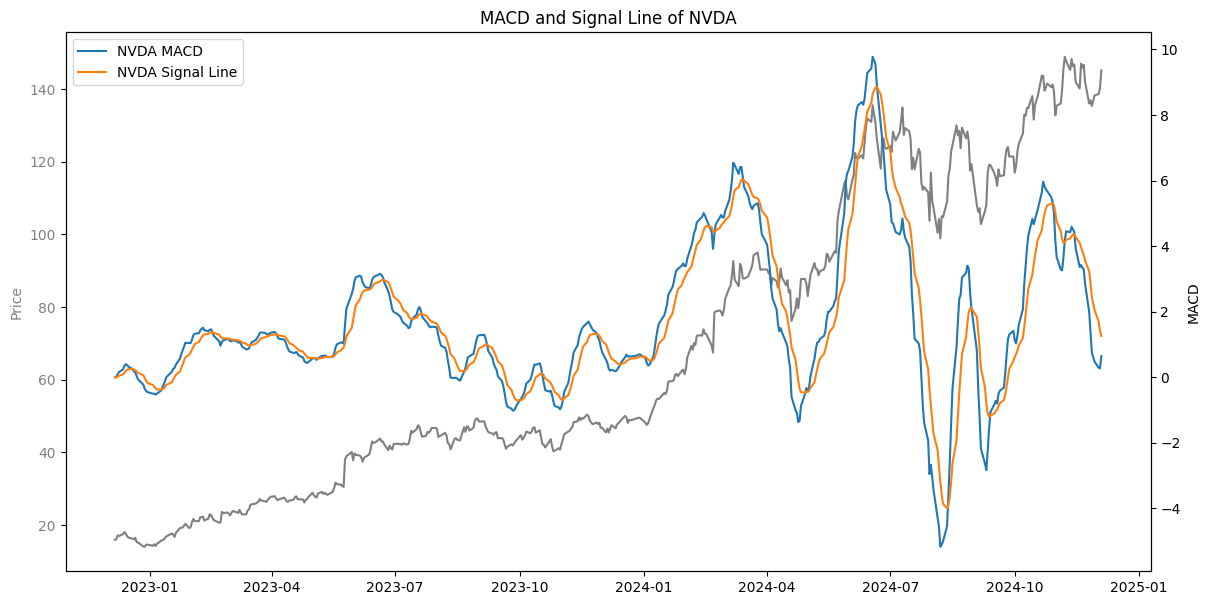

[*********************100%***********************]  1 of 1 completed


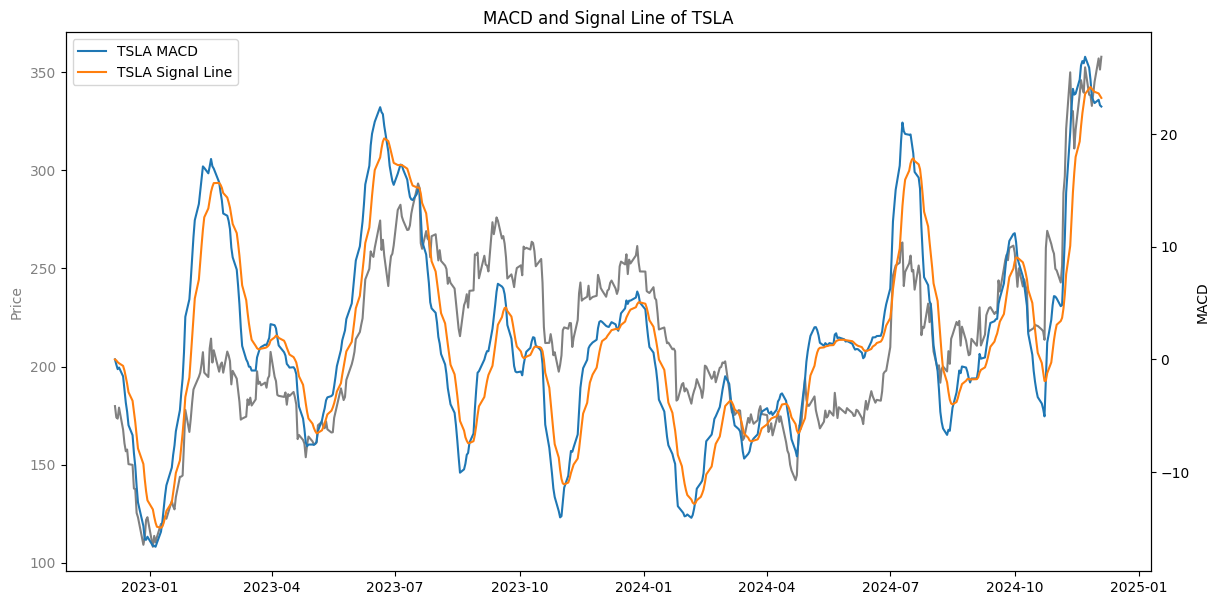

In [ ]:
# Download historical data for each ticker and plot its MACD
for ticker in tickers:
    data_ticker = yf.download(ticker, start=start_date, end=end_date)
    plot_macd(data_ticker, ticker)
